In [1]:
import re, pandas as pd, nltk, matplotlib.pyplot as plt, seaborn as sns, networkx as nx
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from operator import itemgetter
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
from transformers import pipeline
sentiment_model = pipeline("sentiment-analysis", framework="pt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryanz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\ryanz\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


# Crawl

In [50]:
filename = 'hasil_charlie_kirk_die.csv'
keyword = 'charlie kirk die until:2025-09-26 since:2025-09-10 lang:en'
token = '6308e33fed69b148ad339182c68089e73f72d6fc'
limit = 500

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{keyword}" --tab "LATEST" -l {limit} --token {token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/hasil_charlie_kirk_die.csv, renaming to ./tweets-data/hasil_charlie_kirk_die.old.csv

-- Scrolling... (1)
Filling in keywords: charlie kirk die until:2025-09-26 since:2025-09-10 lang:en



Your tweets saved to: c:\Ryan\Kuliah\Semester 5\Data Mining 2\Pratikum\Pratikum 7\tweets-data\hasil_charlie_kirk_die.csv
Total tweets saved: 20

-- Scrolling... (1)

Your tweets saved to: c:\Ryan\Kuliah\Semester 5\Data Mining 2\Pratikum\Pratikum 7\tweets-data\hasil_charlie_kirk_die.csv
Total tweets saved: 30


Your tweets saved to: c:\Ryan\Kuliah\Semester 5\Data Mining 2\Pratikum\Pratiku

In [51]:
filename = 'hasil_charlie_kirk_shoot.csv'
keyword = 'charlie kirk shoot until:2025-09-26 since:2025-09-10 lang:en'
token = '6308e33fed69b148ad339182c68089e73f72d6fc'
limit = 500

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{keyword}" --tab "LATEST" -l {limit} --token {token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/hasil_charlie_kirk_shoot.csv, renaming to ./tweets-data/hasil_charlie_kirk_shoot.old.csv

Filling in keywords: charlie kirk shoot until:2025-09-26 since:2025-09-10 lang:en


-- Scrolling... (1)

Your tweets saved to: c:\Ryan\Kuliah\Semester 5\Data Mining 2\Pratikum\Pratikum 7\tweets-data\hasil_charlie_kirk_shoot.csv
Total tweets saved: 14

-- Scrolling... (1)

Your tweets saved to: c:\Ryan\Kuliah\Semester 5\Data Mining 2\Pratikum\Pratikum 7\tweets-data\hasil_charlie_kirk_shoot.csv
Total tweets saved: 34


Your tweets saved to: c:\Ryan\Kuliah\Semester 5\Data Mining 2\Pratik

[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@5589b1eb08bdebfdd90d03b92eaef629"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@3966fdb6e6a86ffd9de30d7421dd10c6"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@e35d762d58aa2e456dcf3e3afd00ac6b"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@97808e58f1f89aaa74de7b85c9ac0893"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Err

In [2]:
data1 = pd.read_csv('tweets-data/hasil_charlie_kirk_die.csv')
data1

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971244104458830233,Thu Sep 25 23:54:57 +0000 2025,91,@Smil3yAngel @StevePPhill That s absurd. Who w...,1971362823210139882,NaN,Smil3yAngel,en,NaN,0,1,8,https://x.com/undefined/status/197136282321013...,1564707854212182016,NaN
1,1970832563427058020,Thu Sep 25 23:40:45 +0000 2025,0,@Revolt_In_Red @bennyjohnson Good. That is rig...,1971359249268867204,https://pbs.twimg.com/tweet_video_thumb/G1usyL...,Revolt_In_Red,en,NaN,0,0,0,https://x.com/undefined/status/197135924926886...,1812290509072945152,NaN
2,1971213481451106792,Thu Sep 25 23:38:51 +0000 2025,0,@PatriciaHeaton Charlie Kirk was a cunt. But n...,1971358771651006832,NaN,PatriciaHeaton,en,NaN,0,0,0,https://x.com/undefined/status/197135877165100...,1430300024261406722,NaN
3,1971358629719834992,Thu Sep 25 23:38:18 +0000 2025,0,Charlie Kirk didn t die in vain. Charlie Kirk ...,1971358629719834992,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197135862971983...,1225241339807354880,NaN
4,1971355978055680253,Thu Sep 25 23:27:45 +0000 2025,0,https://t.co/FTpzoL1OAp this woman said that C...,1971355978055680253,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197135597805568...,1887252363968221184,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1970527568483713415,Wed Sep 24 09:27:20 +0000 2025,0,@matt_vanswol Charlie Kirk said it was Worth I...,1970782091970584830,https://pbs.twimg.com/media/G1mf2aoXYAAdQrC.jpg,matt_vanswol,en,NaN,0,0,0,https://x.com/undefined/status/197078209197058...,732759765181308928,NaN
500,1970723420964037122,Wed Sep 24 09:25:30 +0000 2025,13,@planefag I'm increasingly starting to wonder ...,1970781629057736740,NaN,planefag,en,NaN,0,1,0,https://x.com/undefined/status/197078162905773...,1357504678733385731,NaN
501,1970779831626559662,Wed Sep 24 09:18:21 +0000 2025,1,Rev. 11:11-13 After the humanoid robot killed ...,1970779831626559662,https://pbs.twimg.com/media/G1mdyINXIAAhE8a.jpg,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197077983162655...,1595464646521135107,NaN
502,1967995112467665074,Wed Sep 24 09:13:53 +0000 2025,1,@NewCollegeofFL Charlie Kirk was a racist &amp...,1970778707641143620,NaN,NewCollegeofFL,en,NaN,0,0,0,https://x.com/undefined/status/197077870764114...,1458299593062551555,NaN


In [3]:
data2 = pd.read_csv('tweets-data/hasil_charlie_kirk_shoot.csv')
data2

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971361480944533656,Thu Sep 25 23:49:37 +0000 2025,4,Texas man accused of threatening to shoot up P...,1971361480944533656,NaN,NaN,en,NaN,1,0,5,https://x.com/undefined/status/197136148094453...,826255472546238465,NaN
1,1971355939275145393,Thu Sep 25 23:41:56 +0000 2025,6,@BoooW0o @RealAlexJones Tyler Robinson didn't ...,1971359547316150321,NaN,BoooW0o,en,NaN,0,0,2,https://x.com/undefined/status/197135954731615...,1592787216488538112,NaN
2,1971315284880629905,Thu Sep 25 23:32:23 +0000 2025,2,The Bulge in Charlies neck is PROOF he was sho...,1971357142717432176,NaN,The_Counterer,en,NaN,0,1,0,https://x.com/undefined/status/197135714271743...,1326140799898148864,NaN
3,1971009031528718384,Thu Sep 25 23:31:17 +0000 2025,0,@SaraHCooper1235 @Youcanthandle7 @IngrahamAngl...,1971356864974815694,NaN,SaraHCooper1235,en,NaN,0,0,0,https://x.com/undefined/status/197135686497481...,1758565008861175808,NaN
4,1971354115554082963,Thu Sep 25 23:20:21 +0000 2025,0,Man Who Allegedly Threatened to Shoot Up Gay B...,1971354115554082963,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197135411555408...,224448704,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1970498883756163131,Tue Sep 23 14:43:53 +0000 2025,0,@LauraLoomer @LauraLoomer why did MAGA shoot C...,1970499364352045421,NaN,LauraLoomer,en,NaN,0,0,0,https://x.com/undefined/status/197049936435204...,1082934497023352832,NaN
497,1970445563842728191,Tue Sep 23 14:43:27 +0000 2025,0,@Murph0matic @MiamiHerald I have no idea what ...,1970499254557802762,NaN,Murph0matic,en,NaN,0,1,0,https://x.com/undefined/status/197049925455780...,1518764155016294400,NaN
498,1970493596353667450,Tue Sep 23 14:39:50 +0000 2025,4,@DineshDSouza They had to talk him out of suic...,1970498346193162677,NaN,DineshDSouza,en,NaN,0,2,0,https://x.com/undefined/status/197049834619316...,1702134997514145792,NaN
499,1970444217567617124,Tue Sep 23 14:24:39 +0000 2025,0,@fps80 Don't forget: people like you rallied t...,1970494526222729471,NaN,StevenJBurns,en,NaN,0,1,0,https://x.com/undefined/status/197049452622272...,222665922,NaN


# Prepo

In [4]:
satu_data = pd.concat([data1, data2], axis=0)
satu_data = satu_data.drop_duplicates()
satu_data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971244104458830233,Thu Sep 25 23:54:57 +0000 2025,91,@Smil3yAngel @StevePPhill That s absurd. Who w...,1971362823210139882,NaN,Smil3yAngel,en,NaN,0,1,8,https://x.com/undefined/status/197136282321013...,1564707854212182016,NaN
1,1970832563427058020,Thu Sep 25 23:40:45 +0000 2025,0,@Revolt_In_Red @bennyjohnson Good. That is rig...,1971359249268867204,https://pbs.twimg.com/tweet_video_thumb/G1usyL...,Revolt_In_Red,en,NaN,0,0,0,https://x.com/undefined/status/197135924926886...,1812290509072945152,NaN
2,1971213481451106792,Thu Sep 25 23:38:51 +0000 2025,0,@PatriciaHeaton Charlie Kirk was a cunt. But n...,1971358771651006832,NaN,PatriciaHeaton,en,NaN,0,0,0,https://x.com/undefined/status/197135877165100...,1430300024261406722,NaN
3,1971358629719834992,Thu Sep 25 23:38:18 +0000 2025,0,Charlie Kirk didn t die in vain. Charlie Kirk ...,1971358629719834992,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197135862971983...,1225241339807354880,NaN
4,1971355978055680253,Thu Sep 25 23:27:45 +0000 2025,0,https://t.co/FTpzoL1OAp this woman said that C...,1971355978055680253,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197135597805568...,1887252363968221184,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1970498883756163131,Tue Sep 23 14:43:53 +0000 2025,0,@LauraLoomer @LauraLoomer why did MAGA shoot C...,1970499364352045421,NaN,LauraLoomer,en,NaN,0,0,0,https://x.com/undefined/status/197049936435204...,1082934497023352832,NaN
497,1970445563842728191,Tue Sep 23 14:43:27 +0000 2025,0,@Murph0matic @MiamiHerald I have no idea what ...,1970499254557802762,NaN,Murph0matic,en,NaN,0,1,0,https://x.com/undefined/status/197049925455780...,1518764155016294400,NaN
498,1970493596353667450,Tue Sep 23 14:39:50 +0000 2025,4,@DineshDSouza They had to talk him out of suic...,1970498346193162677,NaN,DineshDSouza,en,NaN,0,2,0,https://x.com/undefined/status/197049834619316...,1702134997514145792,NaN
499,1970444217567617124,Tue Sep 23 14:24:39 +0000 2025,0,@fps80 Don't forget: people like you rallied t...,1970494526222729471,NaN,StevenJBurns,en,NaN,0,1,0,https://x.com/undefined/status/197049452622272...,222665922,NaN


In [5]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text


satu_data['full_text_bersih'] = satu_data['full_text'].apply(clean_text)
satu_text = ' '.join(satu_data['full_text_bersih'].tolist())

In [6]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [7]:
tokens = word_tokenize(satu_text)
stemmed_tokens = [stemmer.stem(token) for token in tokens]
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
filtered_tokens = [i for i in lemmatized_tokens if i not in stop_words and len(i) > 2]

# Visualisasi text

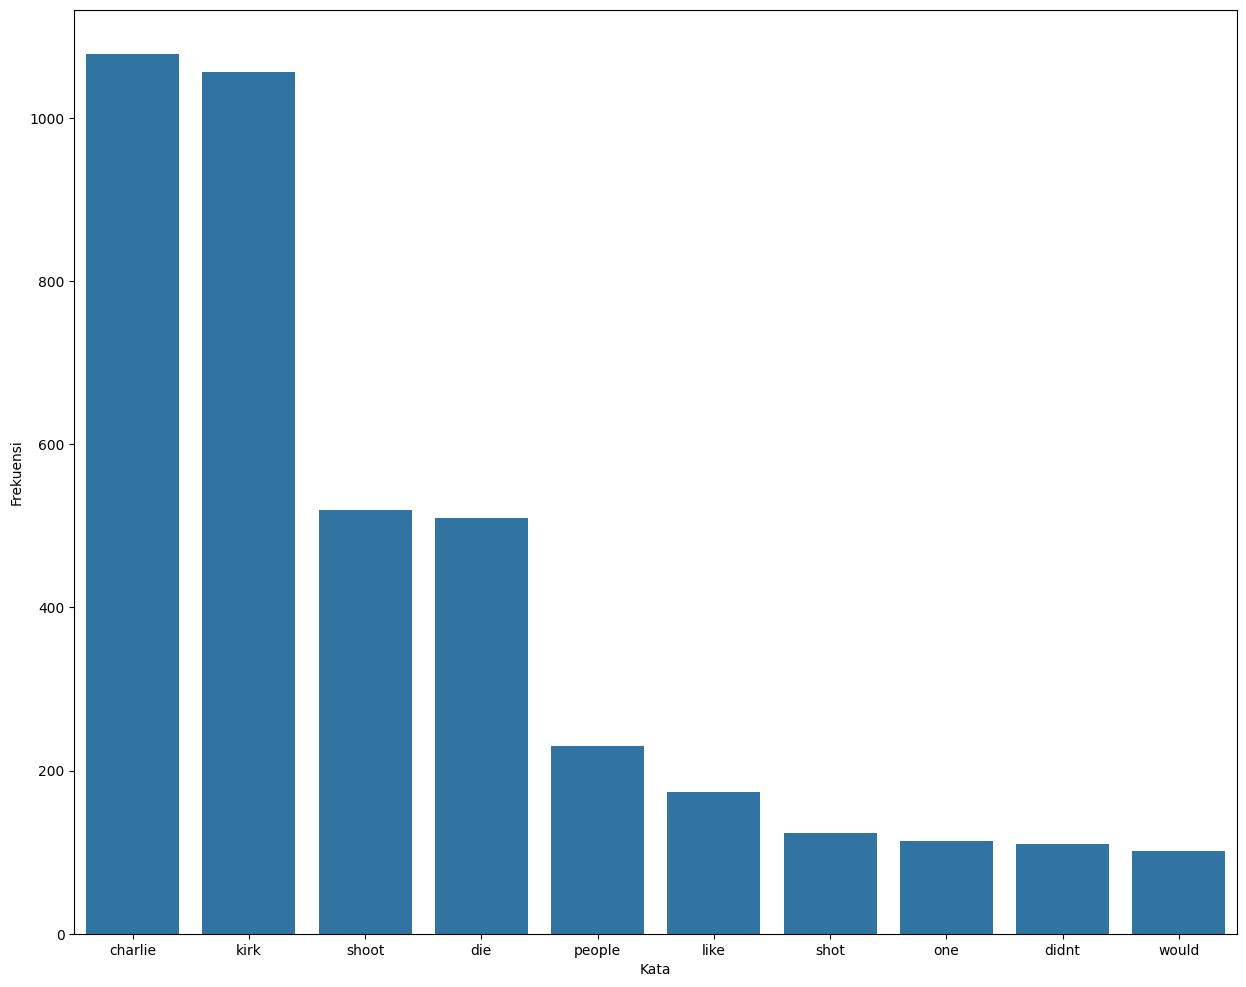

In [8]:
fdist = FreqDist(filtered_tokens)
kata_sering = fdist.most_common(10)
word_freq = pd.DataFrame(kata_sering, columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(15, 12))
sns.barplot(x='Kata', y='Frekuensi', data=word_freq)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

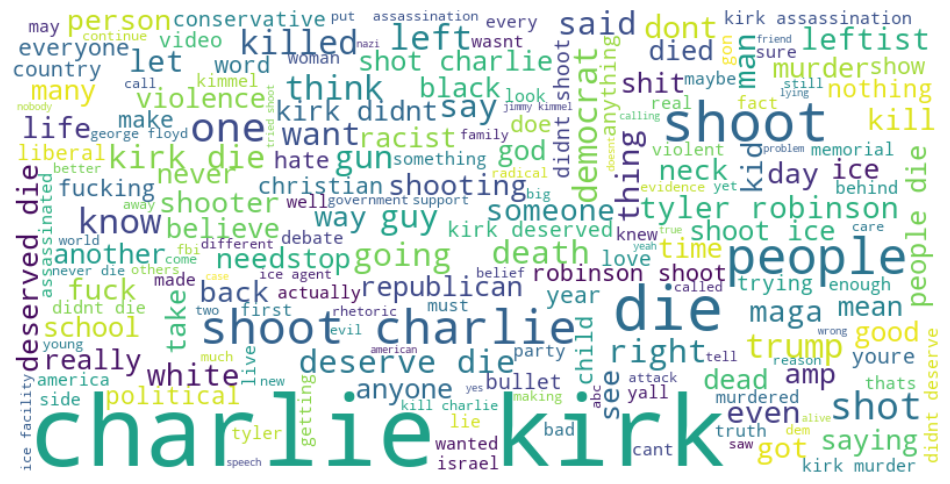

In [9]:
text = " ".join(filtered_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cluster

In [10]:
tweet = satu_data['full_text_bersih'].tolist()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tweet)

kmeans = KMeans(n_clusters=3, random_state=42)
satu_data['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [11]:
satu_data[['full_text_bersih', 'cluster']]

,full_text_bersih,cluster
0,that s absurd who wants to miss out on a pla...,0
1,good that is righteous anger and anger is a ...,0
2,charlie kirk was a cunt but nobody deserves t...,1
3,charlie kirk didn t die in vain charlie kirk w...,1
4,this woman said that charlie kirk deserve to ...,2
...,...,...
496,why did maga shoot charlie kirk was there a ...,1
497,i have no idea what you are even babbling ab...,2
498,they had to talk him out of suicide but he wa...,1
499,dont forget people like you rallied the crazi...,0


In [12]:
print(satu_data['cluster'].value_counts())

cluster
2    507
1    313
0    183
Name: count, dtype: int64


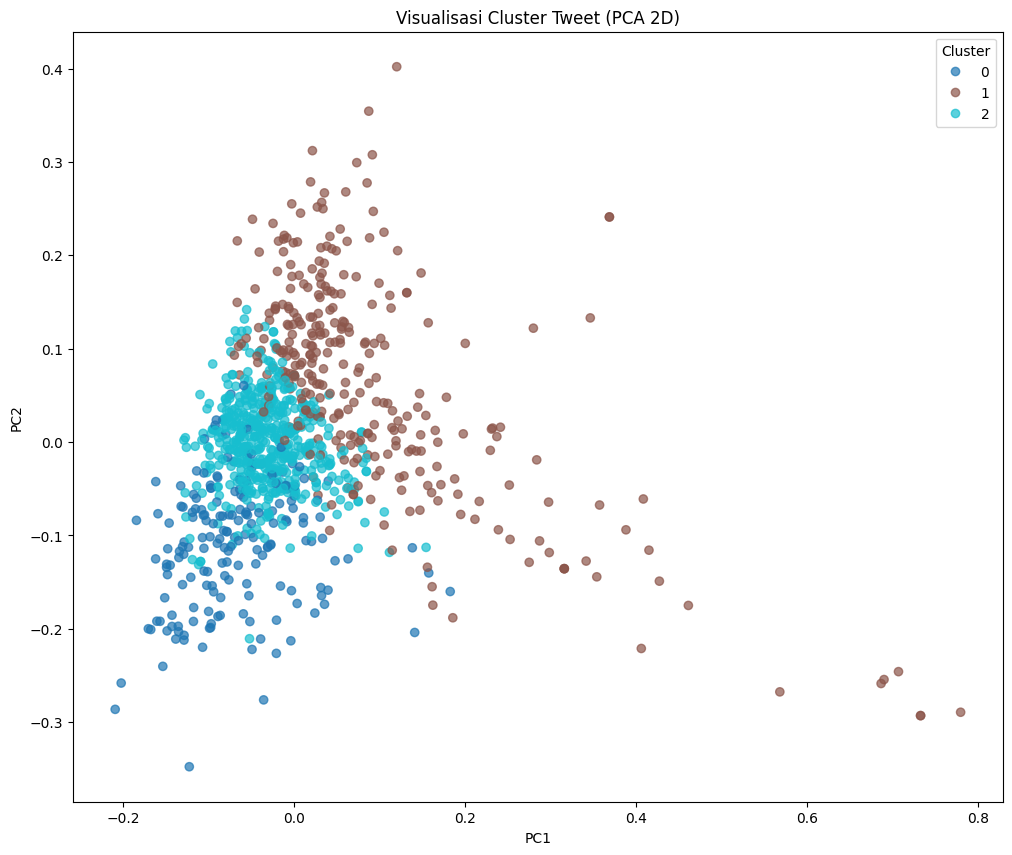

In [13]:
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(12,10))
scatter = plt.scatter(reduced[:,0], reduced[:,1], c=satu_data['cluster'], cmap="tab10", alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("Visualisasi Cluster Tweet (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [14]:
sil_score = silhouette_score(tfidf_matrix, satu_data['cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.006


# Sentiment Analisis

In [15]:
satu_data['sentiment'] = satu_data['full_text_bersih'].apply(lambda x: sentiment_model(x[:512])[0]['label'])

In [16]:
print(satu_data[['full_text', 'sentiment']])

                                             full_text sentiment
0    @Smil3yAngel @StevePPhill That s absurd. Who w...  NEGATIVE
1    @Revolt_In_Red @bennyjohnson Good. That is rig...  POSITIVE
2    @PatriciaHeaton Charlie Kirk was a cunt. But n...  POSITIVE
3    Charlie Kirk didn t die in vain. Charlie Kirk ...  POSITIVE
4    https://t.co/FTpzoL1OAp this woman said that C...  NEGATIVE
..                                                 ...       ...
496  @LauraLoomer @LauraLoomer why did MAGA shoot C...  NEGATIVE
497  @Murph0matic @MiamiHerald I have no idea what ...  NEGATIVE
498  @DineshDSouza They had to talk him out of suic...  NEGATIVE
499  @fps80 Don't forget: people like you rallied t...  POSITIVE
500  @markrmznyc___ I mean the republicans didn t s...  POSITIVE

[1003 rows x 2 columns]


In [ ]:
satu_data

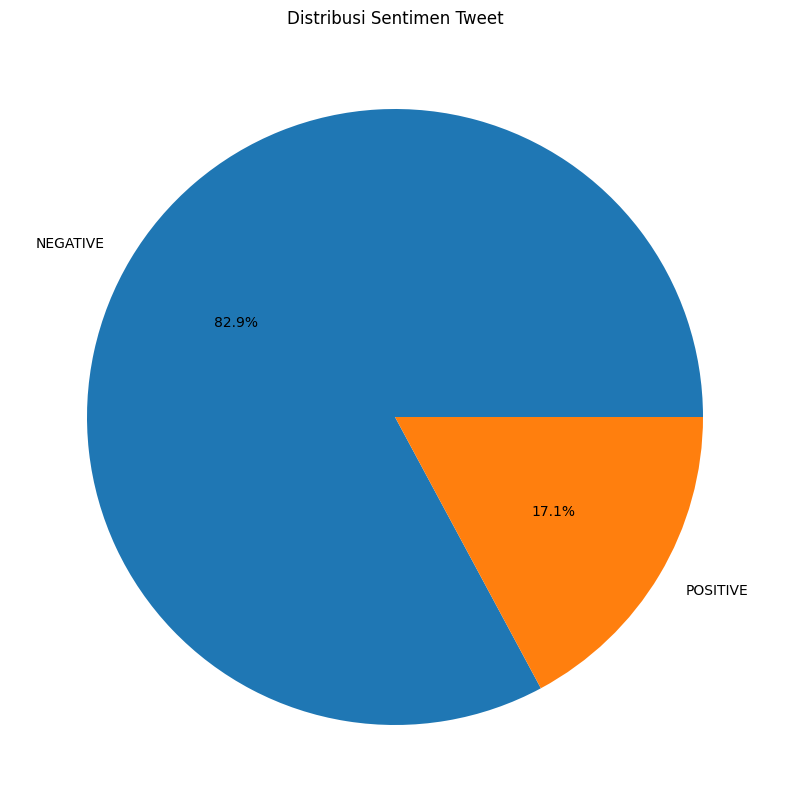

In [17]:
sentiment_counts = satu_data['sentiment'].value_counts()

plt.figure(figsize=(12, 10))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%')
plt.title("Distribusi Sentimen Tweet")
plt.show()

In [18]:
positive_tweets = satu_data[satu_data['sentiment'] == 'POSITIVE']
positive_tweets

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_bersih,cluster,sentiment
1,1970832563427058020,Thu Sep 25 23:40:45 +0000 2025,0,@Revolt_In_Red @bennyjohnson Good. That is rig...,1971359249268867204,https://pbs.twimg.com/tweet_video_thumb/G1usyL...,Revolt_In_Red,en,NaN,0,0,0,https://x.com/undefined/status/197135924926886...,1812290509072945152,NaN,good that is righteous anger and anger is a ...,0,POSITIVE
2,1971213481451106792,Thu Sep 25 23:38:51 +0000 2025,0,@PatriciaHeaton Charlie Kirk was a cunt. But n...,1971358771651006832,NaN,PatriciaHeaton,en,NaN,0,0,0,https://x.com/undefined/status/197135877165100...,1430300024261406722,NaN,charlie kirk was a cunt but nobody deserves t...,1,POSITIVE
3,1971358629719834992,Thu Sep 25 23:38:18 +0000 2025,0,Charlie Kirk didn t die in vain. Charlie Kirk ...,1971358629719834992,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197135862971983...,1225241339807354880,NaN,charlie kirk didn t die in vain charlie kirk w...,1,POSITIVE
6,1971354019277963308,Thu Sep 25 23:22:19 +0000 2025,3,@victoriousellie Technically he didn't 'die'. ...,1971354608770613705,NaN,victoriousellie,en,NaN,0,0,0,https://x.com/undefined/status/197135460877061...,1689446241124458497,NaN,technically he didnt die he is actually more ...,1,POSITIVE
9,1971351474254016632,Thu Sep 25 23:09:52 +0000 2025,7,They are gaining popular support for their far...,1971351474254016632,NaN,NaN,en,NaN,0,2,0,https://x.com/undefined/status/197135147425401...,1825907831440117760,NaN,they are gaining popular support for their far...,2,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1969954435012153798,Tue Sep 23 19:20:09 +0000 2025,2,@luistschira @RealCandaceO 2 things I know in ...,1970568890137919741,NaN,luistschira,en,NaN,0,0,0,https://x.com/undefined/status/197056889013791...,555624752,NaN,things i know in my heart epstein didn t ki...,1,POSITIVE
462,1970212920073023779,Tue Sep 23 18:27:45 +0000 2025,0,@MattWalshBlog Except Tyler Robinson didn't sh...,1970555702721815014,https://pbs.twimg.com/media/G1jR-CQWQAAfEjl.jpg,MattWalshBlog,en,NaN,0,0,0,https://x.com/undefined/status/197055570272181...,1641101368935972864,NaN,except tyler robinson didnt shoot and kill ch...,0,POSITIVE
471,1970543132615012613,Tue Sep 23 17:37:48 +0000 2025,0,Charlie Kirk buried alive? Mauser Model 98 .3...,1970543132615012613,NaN,NaN,en,NaN,0,2,0,https://x.com/undefined/status/197054313261501...,1693264557752426496,NaN,charlie kirk buried alive mauser model used...,1,POSITIVE
499,1970444217567617124,Tue Sep 23 14:24:39 +0000 2025,0,@fps80 Don't forget: people like you rallied t...,1970494526222729471,NaN,StevenJBurns,en,NaN,0,1,0,https://x.com/undefined/status/197049452622272...,222665922,NaN,dont forget people like you rallied the crazi...,0,POSITIVE


# SNA

In [19]:
G_mention = nx.DiGraph()

for r in satu_data.iterrows():
    author = r[1]['username']
    author = f'@{author}'
    text = r[1]['full_text']

    try:
        timestamp = pd.to_datetime(r[1]['created_at'])
    except:
        continue

    mentions = set(re.findall(r"@(\w+)", text))

    if len(mentions) > 0:
        for u in mentions:
            u = f'@{u}'
            G_mention.add_edge(author, u, Timestamp=timestamp)

In [ ]:
graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

print("centrality measures:", graph_centrality)
print("closeness centrality:", graph_closeness)
print("betweenness centrality:", graph_betweenness)
print("max degree:", max_de)
print("max closeness:", max_clo)
print("max betweenness:", max_bet)

centrality measures: {'@nan': 1.0, '@Smil3yAngel': 0.0009505703422053232, '@StevePPhill': 0.0009505703422053232, '@bennyjohnson': 0.0009505703422053232, '@Revolt_In_Red': 0.0009505703422053232, '@PatriciaHeaton': 0.0009505703422053232, '@4utumnHarvest': 0.0009505703422053232, '@yumipill': 0.0009505703422053232, '@BeryAngryPuppy': 0.0009505703422053232, '@victoriousellie': 0.0009505703422053232, '@AlaskanCourtney': 0.0009505703422053232, '@Adam4004': 0.0009505703422053232, '@KaiTrumpJr': 0.0009505703422053232, '@douglas03517065': 0.0009505703422053232, '@fbi': 0.0009505703422053232, '@1stForAll': 0.0009505703422053232, '@WhiteHouse': 0.0009505703422053232, '@SteveKrak': 0.0009505703422053232, '@LuddicPath': 0.0009505703422053232, '@JLucroy20': 0.0009505703422053232, '@Know_More_News': 0.0009505703422053232, '@jessicachastain': 0.0009505703422053232, '@MerylStreepPage': 0.0009505703422053232, '@TheJenGarner': 0.0009505703422053232, '@megynkelly': 0.0009505703422053232, '@LUNCmoonWEN': 0.

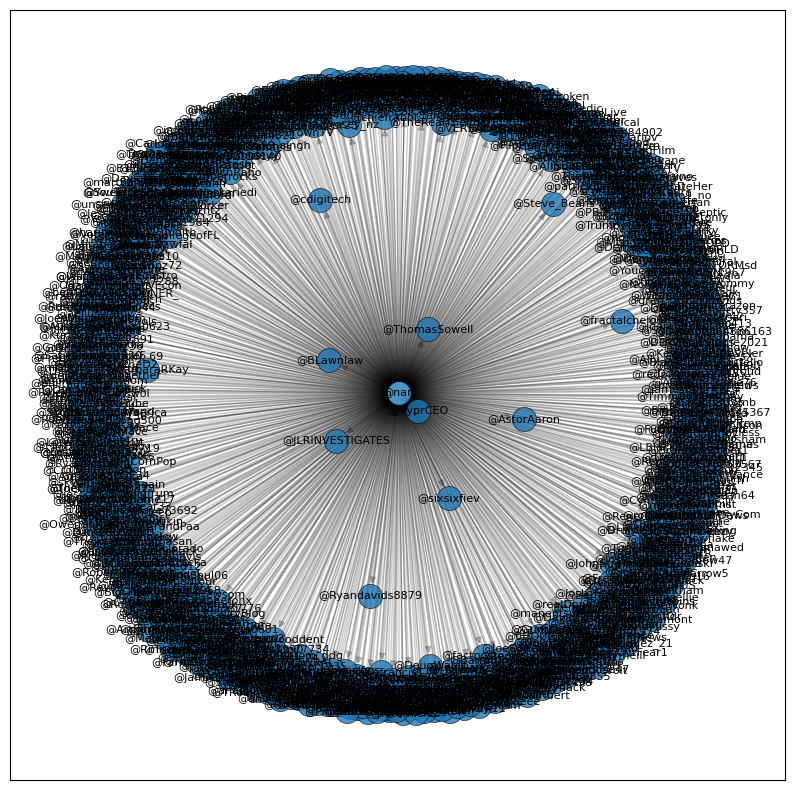

In [21]:
G = G_mention

pos = nx.spring_layout(G)

f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')

nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

plt.show()

In [22]:
degree_centrality = nx.degree_centrality(G_mention)
betweenness_centrality = nx.betweenness_centrality(G_mention)
closeness_centrality = nx.closeness_centrality(G_mention)

top_degree_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

print("Top 5 users by degree centrality:")
for node, centrality in top_degree_nodes:
    print(f"{node}: {centrality}")

print("Top 5 users by betweenness centrality:")
for node, centrality in top_betweenness_nodes:
    print(f"{node}: {centrality}")

print("Top 5 users by closeness centrality:")
for node, centrality in top_closeness_nodes:
    print(f"{node}: {centrality}")

Top 5 users by degree centrality:
@nan: 1.0
@Smil3yAngel: 0.0009505703422053232
@StevePPhill: 0.0009505703422053232
@bennyjohnson: 0.0009505703422053232
@Revolt_In_Red: 0.0009505703422053232
Top 5 users by betweenness centrality:
@nan: 0.0
@Smil3yAngel: 0.0
@StevePPhill: 0.0
@bennyjohnson: 0.0
@Revolt_In_Red: 0.0
Top 5 users by closeness centrality:
@Smil3yAngel: 0.0009505703422053232
@StevePPhill: 0.0009505703422053232
@bennyjohnson: 0.0009505703422053232
@Revolt_In_Red: 0.0009505703422053232
@PatriciaHeaton: 0.0009505703422053232
